## Outliers
1. Data points which is very much different from the other data points or records.

### Which Machine Learnings models are sensitive to Outliers?
1. Naive Bayes Classifier --- Not Sensitive to Outliers
2. SVM                    --- Not Sensitive to Outliers
3. Linear Regression      --- Sensitive to Outliers
4. Logistic Regression    --- Sensitive to Outliers
5. Desicion Tree Regressor or Classifier --- Not Sensitive to Outliers
6. Ensemble (RF, XGBoost, GB) --- Not Sensitive to Outliers
7. KNN                    ---- Not Sensitive to Outliers
8. K Means                ---- Sensitive to Outliers
9. Hierarchical           ---- Sensitive to Outliers
10. PCA                   ---- Sensitive to Outliers
11. Neural Networks       ---- Sensitive to Outliers

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../CSV Files/titanic_train.csv')

In [3]:
df.head()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH",1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,NaN,NaN,"Barre, Co Washington, VT",0


In [4]:
df.columns

Index(['passenger_id', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch',
       'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest',
       'survived'],
      dtype='object')

In [5]:
columns = ['passenger_id', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch',
       'ticket', 'fare', 'cabin', 'embarked', 'survived']

In [6]:
df = df[columns]

In [7]:
df.head()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,0


In [8]:
## Percenateg of Null values

df.isnull().mean()

passenger_id    0.000000
pclass          0.000000
name            0.000000
sex             0.000000
age             0.204706
sibsp           0.000000
parch           0.000000
ticket          0.000000
fare            0.001176
cabin           0.775294
embarked        0.001176
survived        0.000000
dtype: float64

In [9]:
df.isnull().sum()

passenger_id      0
pclass            0
name              0
sex               0
age             174
sibsp             0
parch             0
ticket            0
fare              1
cabin           659
embarked          1
survived          0
dtype: int64

In [10]:
df.shape

(850, 12)

## Gaussian Distribution
1. Use 3 std deviation to remove outliers
2. Use IQR to find lower_bound and upper bound to remove outliers

<AxesSubplot:xlabel='age', ylabel='Density'>

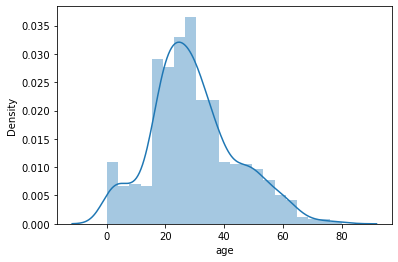

In [11]:
sns.distplot(df.age.dropna())

<AxesSubplot:xlabel='age', ylabel='Density'>

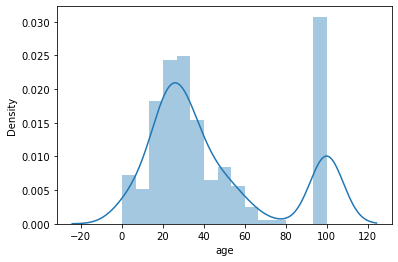

In [12]:
sns.distplot(df.age.fillna(100))

Text(0, 0.5, 'No of Passenger')

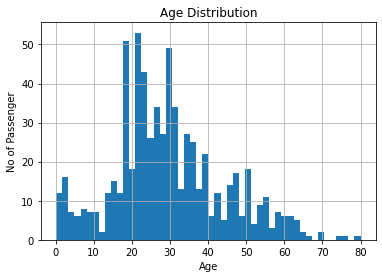

In [13]:
figure = df.age.hist(bins=50)
figure.set_title('Age Distribution')
figure.set_xlabel('Age')
figure.set_ylabel('No of Passenger')

<AxesSubplot:ylabel='age'>

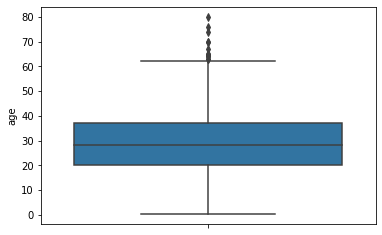

In [14]:
sns.boxplot(y = 'age', data=df)

In [15]:
df.age.describe()

count    676.000000
mean      29.519847
std       14.562243
min        0.166700
25%       20.000000
50%       28.000000
75%       37.000000
max       80.000000
Name: age, dtype: float64

### Assuming Age follows the Gaussian Distribution we will calculate the boundaries which differentiates the outliers

In [16]:
upper_limit = df.age.mean() + 3 * df.age.std()

In [17]:
upper_limit

73.20657749172571

In [18]:
lower_limit = df.age.mean() - 3 * df.age.std()
lower_limit

-14.166883113027474

In [19]:
IQR = df.age.quantile(0.75) - df.age.quantile(0.25)
IQR

17.0

In [20]:
lower_bound = df.age.quantile(0.25) - 1.5 * (IQR)
upper_bound = df.age.quantile(0.75) + 1.5 * (IQR)

lower_bound, upper_bound

(-5.5, 62.5)

In [21]:
df.shape

(850, 12)

In [22]:
df = df[(df['age'] < upper_limit)]

In [23]:
df.shape

(673, 12)

In [24]:
df.head()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,0
5,1083,3,"Olsen, Mr. Henry Margido",male,28.0,0,0,C 4001,22.5250,NaN,S,0


In [25]:
df.age.isnull().sum()

0

<AxesSubplot:ylabel='age'>

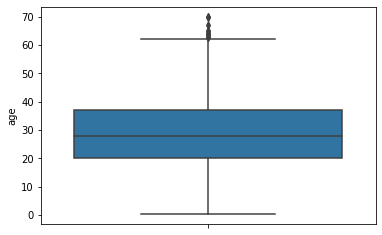

In [26]:
sns.boxplot(y='age', data=df)

<AxesSubplot:xlabel='age', ylabel='Density'>

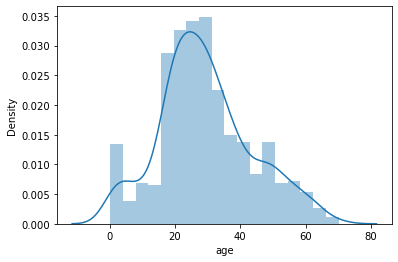

In [27]:
sns.distplot(df.age)

## Skewed Feature

In [28]:
df = pd.read_csv('../CSV Files/titanic_train.csv')
columns = ['passenger_id', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch',
       'ticket', 'fare', 'cabin', 'embarked', 'survived']
df = df[columns]
df.head()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,0


Text(0, 0.5, 'Count')

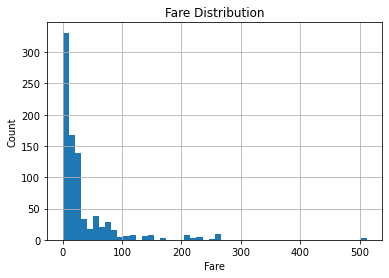

In [29]:
figure = df.fare.hist(bins=50)
figure.set_title('Fare Distribution')
figure.set_xlabel('Fare')
figure.set_ylabel('Count')

<AxesSubplot:xlabel='sex', ylabel='count'>

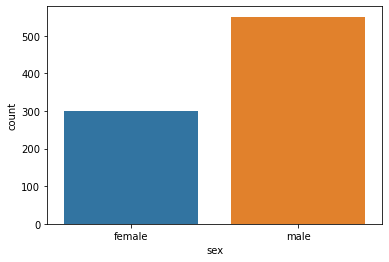

In [30]:
sns.countplot(x='sex', data=df)

In [31]:
df.isnull().sum()

passenger_id      0
pclass            0
name              0
sex               0
age             174
sibsp             0
parch             0
ticket            0
fare              1
cabin           659
embarked          1
survived          0
dtype: int64

In [32]:
df.fare.min()

0.0

<AxesSubplot:ylabel='fare'>

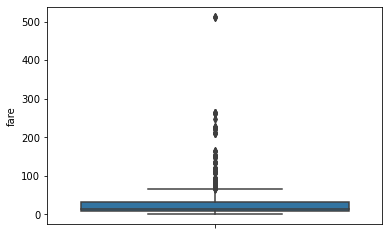

In [33]:
sns.boxplot(y='fare', data=df)

In [34]:
df.fare.describe()

count    849.000000
mean      34.012701
std       53.705779
min        0.000000
25%        7.895800
50%       14.108300
75%       31.000000
max      512.329200
Name: fare, dtype: float64

In [35]:
IQR = df.fare.quantile(0.75) - df.fare.quantile(0.25)
IQR

23.1042

In [36]:
lower_bound = df.fare.quantile(0.25) - 1.5 * (IQR)
upper_bound = df.fare.quantile(0.75) + 1.5 * (IQR)

lower_bound, upper_bound

(-26.7605, 65.6563)

In [37]:
lower_bound = df.fare.quantile(0.25) - 3 * (IQR)
upper_bound = df.fare.quantile(0.75) + 3 * (IQR)

lower_bound, upper_bound

(-61.4168, 100.3126)

In [38]:
df = df[df.fare < upper_bound]

In [39]:
df.fare.max()

93.5

<AxesSubplot:ylabel='fare'>

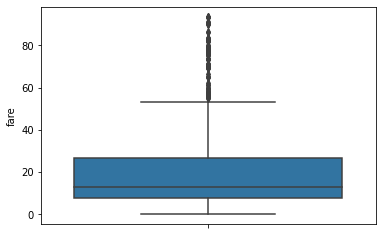

In [40]:
sns.boxplot(y='fare', data=df)

In [41]:
df.fare.describe()

count    792.000000
mean      22.335143
std       21.202864
min        0.000000
25%        7.895800
50%       13.000000
75%       26.550000
max       93.500000
Name: fare, dtype: float64

<AxesSubplot:xlabel='fare', ylabel='Density'>

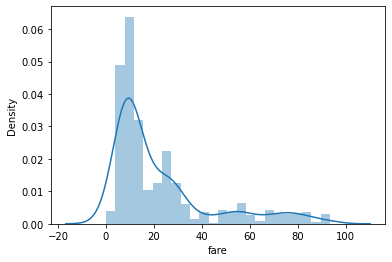

In [42]:
sns.distplot(df.fare)

In [43]:
df.isnull().sum()

passenger_id      0
pclass            0
name              0
sex               0
age             173
sibsp             0
parch             0
ticket            0
fare              0
cabin           650
embarked          1
survived          0
dtype: int64

In [47]:
df[df.fare == 0.0]

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
6,898,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S,0
95,150,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S,0
114,170,1,"Ismay, Mr. Joseph Bruce",male,49.0,0,0,112058,0.0,B52 B54 B56,S,1
140,70,1,"Chisholm, Mr. Roderick Robert Crispin",male,NaN,0,0,112051,0.0,NaN,S,0
145,896,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S,0
340,223,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S,0
346,234,1,"Reuchlin, Jonkheer. John George",male,38.0,0,0,19972,0.0,NaN,S,0
506,125,1,"Fry, Mr. Richard",male,NaN,0,0,112058,0.0,B102,S,0
586,963,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S,0
703,410,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S,0


Text(0, 0.5, 'Count')

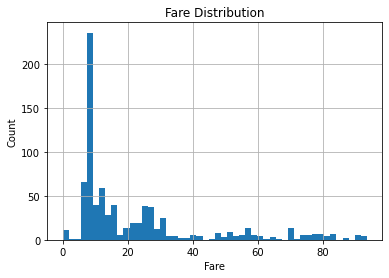

In [48]:
figure = df.fare.hist(bins=50)
figure.set_title('Fare Distribution')
figure.set_xlabel('Fare')
figure.set_ylabel('Count')